In [23]:
import os
import h5py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import itertools
import os
import sys
import json
from matplotlib.collections import LineCollection
import lmfit
import pickle

# from clustering_scripts import *

In [2]:
def folder_create(path):
    # check if folder exists
    if not os.path.exists(path):
        os.makedirs(path)
        print("Created folder: ", path)

In [3]:
def make_line_collection(data, amplitude, times, idx_skip=0, max_amplitude=None, min_amplitude=None):
    y = data[:,::idx_skip].copy()
    amp = amplitude[::idx_skip].copy()

    if max_amplitude is None:
        max_amplitude = np.max(amp)
    if min_amplitude is None:
        min_amplitude = np.min(amp)

    mask = (amp >= min_amplitude) & (amp <= max_amplitude)

    colormap = plt.cm.get_cmap("viridis")
    colors = [colormap(i) for i in (amp - min_amplitude) / (max_amplitude - min_amplitude)]

    # apply mask
    y[:, ~mask] = np.nan

    segs = np.zeros((len(y[0]), len(y), 2))
    segs[:,:,0] = times[:]
    segs[:,:,1] = y.T

    return segs, colors

In [4]:
DATADIR = "../data/"
FIGDIR = "../img/"

In [5]:
amplitude_choices = {
    "all": (None, None),
    "inner_core": (0, 5),
    "outer_core": (5, 10),
    "tail": (10, 15),
    "chaos": (15, None),
}

fig_name_list = [
    "worst_zeta_min",
    "worst_zeta_avg",
    # "worst_zeta_max",
    # "best_zeta_min",
    # "best_zeta_avg",
    # "best_zeta_max",
]

filenames_rem = [
    "rem_b1_worst_zeta_min.h5",
    "rem_b1_worst_zeta_avg.h5",
    # "rem_b1_worst_zeta_max.h5",
    # "rem_b1_best_zeta_min.h5",
    # "rem_b1_best_zeta_avg.h5",
    # "rem_b1_best_zeta_max.h5",
]

filenames_disp = [
    "log_displacement_b1_worst_zeta_min.h5",
    "log_displacement_b1_worst_zeta_avg.h5",
    # "log_displacement_b1_worst_zeta_max.h5",
    # "log_displacement_b1_best_zeta_min.h5",
    # "log_displacement_b1_best_zeta_avg.h5",
    # "log_displacement_b1_best_zeta_max.h5",
]

filenames_stab = [
    "stability_b1_worst_zeta_min.h5",
    "stability_b1_worst_zeta_avg.h5",
    # "stability_b1_worst_zeta_max.h5",
    # "stability_b1_best_zeta_min.h5",
    # "stability_b1_best_zeta_avg.h5",
    # "stability_b1_best_zeta_max.h5",
]


In [6]:
with h5py.File(os.path.join(DATADIR, "log_displacement_b1_worst_zeta_max.h5"), "r") as f:
    amplitude = np.sqrt(
        f["reference/initial/x_norm"][:]**2 + f["reference/initial/y_norm"][:]**2
    )
    times = list(sorted([int(i) for i in f["disp/x_norm/log_disp"].keys()]))

    # print(f["disp/x_norm"].keys())
    disp_x = np.array([f["disp/x_norm/log_disp/{}".format(i)] for i in times])
    disp_y = np.array([f["disp/y_norm/log_disp/{}".format(i)] for i in times])
    disp_px = np.array([f["disp/px_norm/log_disp/{}".format(i)] for i in times])
    disp_py = np.array([f["disp/py_norm/log_disp/{}".format(i)] for i in times])
    disp_zeta = np.array([f["disp/zeta_norm/log_disp/{}".format(i)] for i in times])
    disp_pzeta = np.array([f["disp/pzeta_norm/log_disp/{}".format(i)] for i in times])

    nbdisp_x = np.array([f["disp/x_norm/log_disp_nobirk/{}".format(i)] for i in times])
    nbdisp_y = np.array([f["disp/y_norm/log_disp_nobirk/{}".format(i)] for i in times])
    nbdisp_px = np.array([f["disp/px_norm/log_disp_nobirk/{}".format(i)] for i in times])
    nbdisp_py = np.array([f["disp/py_norm/log_disp_nobirk/{}".format(i)] for i in times])
    nbdisp_zeta = np.array([f["disp/zeta_norm/log_disp_nobirk/{}".format(i)] for i in times])
    nbdisp_pzeta = np.array([f["disp/pzeta_norm/log_disp_nobirk/{}".format(i)] for i in times])

with h5py.File(os.path.join(DATADIR, "stability_b1_worst_zeta_max.h5"), "r") as f:
    stability = f["stability"][:]

/tmp/ipykernel_34441/873856166.py:1: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10(disp_y[-1]), bins=100);


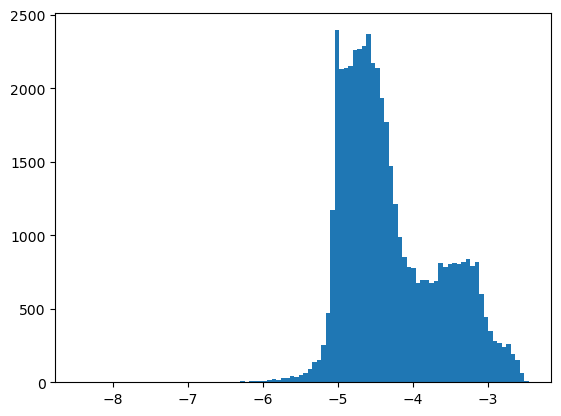

In [7]:
plt.hist(np.log10(disp_y[-1]), bins=100);

/tmp/ipykernel_34441/4065377056.py:1: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(disp_x[-1]).reshape(300, 300), origin="lower", cmap="viridis", vmin=-5)


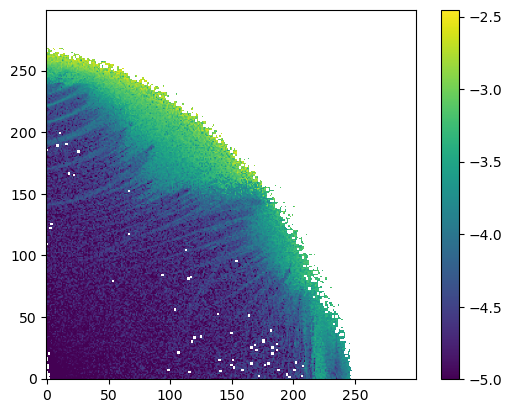

In [12]:
plt.imshow(np.log10(disp_x[-1]).reshape(300, 300), origin="lower", cmap="viridis", vmin=-5)
plt.colorbar();

In [13]:
idx_available = np.where(np.log10(disp_y[-1]) < -4.7)[0]
idx_regular = idx_available[np.random.randint(0, len(idx_available))]

/tmp/ipykernel_34441/4265830430.py:1: RuntimeWarning: invalid value encountered in log10
  idx_available = np.where(np.log10(disp_y[-1]) < -4.7)[0]


In [14]:
idx_available = np.where(np.log10(disp_y[-1]) > -3.5)[0]
idx_chaos = idx_available[np.random.randint(0, len(idx_available))]

/tmp/ipykernel_34441/2160207567.py:1: RuntimeWarning: invalid value encountered in log10
  idx_available = np.where(np.log10(disp_y[-1]) > -3.5)[0]


/tmp/ipykernel_34441/778442191.py:1: RuntimeWarning: invalid value encountered in log10
  plt.plot(times, np.log10(disp_y[:, idx_regular]), label="Regular")
/tmp/ipykernel_34441/778442191.py:2: RuntimeWarning: invalid value encountered in log10
  plt.plot(times, np.log10(nbdisp_y[:, idx_regular]), label="Regular")
/tmp/ipykernel_34441/778442191.py:4: RuntimeWarning: invalid value encountered in log10
  plt.plot(times, np.log10(disp_y[:, idx_chaos]), label="Chaos")


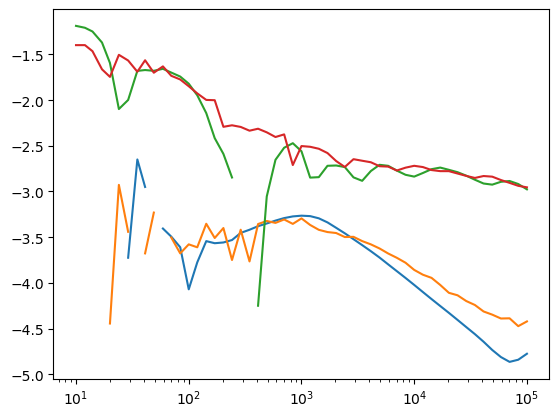

In [15]:
plt.plot(times, np.log10(disp_y[:, idx_regular]), label="Regular")
plt.plot(times, np.log10(nbdisp_y[:, idx_regular]), label="Regular")

plt.plot(times, np.log10(disp_y[:, idx_chaos]), label="Chaos")
plt.plot(times, np.log10(nbdisp_y[:, idx_chaos]), label="Chaos")

plt.xscale("log")

In [16]:
def power_fit(params, x, data=None):
    a = params["a"].value
    b = params["b"].value
    c = params["c"].value

    model = a + b*np.log10(x)
    model[model < c] = c

    if data is None:
        return 10**model
    
    return model - np.log10(data)


def exp_fit(params, x, data=None):
    a = params["a"].value
    b = params["b"].value
    c = params["c"].value

    model = a + (b * x)
    model[model < c] = c

    if data is None:
        return 10**model
    
    return model - np.log10(data)

In [18]:
out_power = []
out_power_knee = []

for i in [idx_regular, idx_chaos]:

    y = disp_x[20:,i]
    mask = (~np.isnan(y)) & (np.isfinite(y)) & (y > 0)
    x = np.asarray(times[20:])[mask]

    
    y = y[mask]

    lmfit_params = lmfit.Parameters()
    lmfit_params.add("a", value=0.0, min=0, vary=False)
    lmfit_params.add("b", value=-1.0, max=0)
    lmfit_params.add("c", value=-23, vary=False)

    lmfit_out_power = lmfit.minimize(power_fit, lmfit_params, args=(x, y))

    lmfit_params = lmfit.Parameters()
    lmfit_params.add("a", value=0.0, min=0, vary=False)
    lmfit_params.add("b", value=-0.001)
    lmfit_params.add("c", value=-3)

    lmfit_out_power_knee = lmfit.minimize(power_fit, lmfit_params, args=(x, y))

    out_power.append(lmfit_out_power)
    out_power_knee.append(lmfit_out_power_knee)


0.041888597660604474 0.040342068736687046
0.21915199700872476 0.018069920581273057


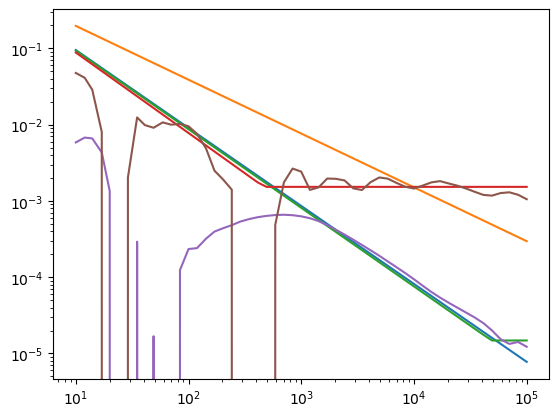

In [20]:
# plot the fits
plt.plot(times, power_fit(out_power[0].params, times), label="Power law")
plt.plot(times, power_fit(out_power[1].params, times), label="Power law")
plt.plot(times, power_fit(out_power_knee[0].params, np.asarray(times)), label="Exponential")
plt.plot(times, power_fit(out_power_knee[1].params, np.asarray(times)), label="Exponential")

for i in [idx_regular, idx_chaos]:

    y = disp_x[:,i]
    mask = (~np.isnan(y)) & (np.isfinite(y))
    x = np.asarray(times)[mask]
    y = y[mask]
    plt.plot(x, y, label="Particle {}".format(i))

plt.xscale("log")
# plt.yscale("log")

for out_p, out_e in zip(out_power, out_power_knee):
    print(out_p.redchi, out_e.redchi)

plt.yscale("log")

In [74]:
out_power = []
out_power_knee = []

for i in tqdm(range(len(disp_x[-1]))):
    if np.all(np.isnan(disp_x[:,i])):
        out_power.append([np.nan, np.nan, np.nan])
        out_power_knee.append([np.nan, np.nan, np.nan])
        continue
    
    y = disp_x[20:,i]
    mask = (~np.isnan(y)) & (np.isfinite(y)) & (y > 0)
    x = np.asarray(times[20:])[mask]
    y = y[mask]
    y /= disp_x[0, i]

    if np.all(np.isnan(y)) or len(y) < 2:
        out_power.append([np.nan, np.nan, np.nan])
        out_power_knee.append([np.nan, np.nan, np.nan])
        continue

    y = disp_x[20:,i]
    mask = (~np.isnan(y)) & (np.isfinite(y)) & (y > 0)
    x = np.asarray(times[20:])[mask]

    
    y = y[mask]

    lmfit_params = lmfit.Parameters()
    lmfit_params.add("a", value=0.0, min=0, vary=False)
    lmfit_params.add("b", value=-1.0, max=0)
    lmfit_params.add("c", value=-23, vary=False)

    lmfit_out_power = lmfit.minimize(power_fit, lmfit_params, args=(x, y))

    lmfit_params = lmfit.Parameters()
    lmfit_params.add("a", value=0.0, min=0, vary=False)
    lmfit_params.add("b", value=-0.001)
    lmfit_params.add("c", value=-1)

    lmfit_out_power_knee = lmfit.minimize(power_fit, lmfit_params, args=(x, y))

    out_power.append([lmfit_out_power.params["a"].value, lmfit_out_power.params["b"].value, lmfit_out_power.params["c"].value, lmfit_out_power.redchi])
    out_power_knee.append([lmfit_out_power_knee.params["a"].value, lmfit_out_power_knee.params["b"].value, lmfit_out_power_knee.params["c"].value, lmfit_out_power_knee.redchi])


  0%|          | 0/90000 [00:00<?, ?it/s]

In [80]:
chroma = np.array([
    np.nan if np.isnan(out_power[i][2]) else
    0.0 if out_power[i][2] > out_power_knee[i][2] else 
    1.0 for i in range(len(out_power))
])

b_power = np.array([out_power[i][2] for i in range(len(out_power))])
b_power_knee = np.array([out_power_knee[i][2] for i in range(len(out_power_knee))])

In [81]:
with open(os.path.join(DATADIR, "lyapunov_fit_b1_worst_zeta_max.pkl"), "wb") as f:
    pickle.dump([out_power, out_power_knee, b_power, b_power_knee, chroma], f)

In [ ]:
with open(os.path.join(DATADIR, "lyapunov_fit_b1_worst_zeta_max.pkl"), "rb") as f:
    out_power, out_power_knee, b_power, b_power_knee, chroma = pickle.load(f)

In [82]:
amplitude_min = np.nanmin(amplitude)
amplitude_max = np.nanmax(amplitude)

amplitude_nbins = 100

amplitude_bins = np.linspace(amplitude_min, amplitude_max+0.1, amplitude_nbins+1)
amplitude_bin_centers = 0.5 * (amplitude_bins[1:] + amplitude_bins[:-1])

amplitude_bin_idx = np.digitize(amplitude, amplitude_bins)
amplitude_bin_idx

b_power_knee_mean = np.zeros(amplitude_nbins)
b_power_knee_std = np.zeros(amplitude_nbins)
b_power_mean = np.zeros(amplitude_nbins)
b_power_std = np.zeros(amplitude_nbins)

for i in range(amplitude_nbins):
    # mask = np.logical_and(amplitude_bin_idx == i+1, chroma==0) 
    mask = amplitude_bin_idx == i+1
    b_power_knee_mean[i] = np.nanmean(np.log10(1/10**b_power_knee)[mask])
    b_power_knee_std[i] = np.nanstd(np.log10(1/10**b_power_knee)[mask])
    b_power_mean[i] = np.nanmean(b_power[mask])
    b_power_std[i] = np.nanstd(b_power[mask])

/tmp/ipykernel_34441/3436997908.py:20: RuntimeWarning: Mean of empty slice
  b_power_knee_mean[i] = np.nanmean(np.log10(1/10**b_power_knee)[mask])
/home/HPC/camontan/anaconda3/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipykernel_34441/3436997908.py:22: RuntimeWarning: Mean of empty slice
  b_power_mean[i] = np.nanmean(b_power[mask])


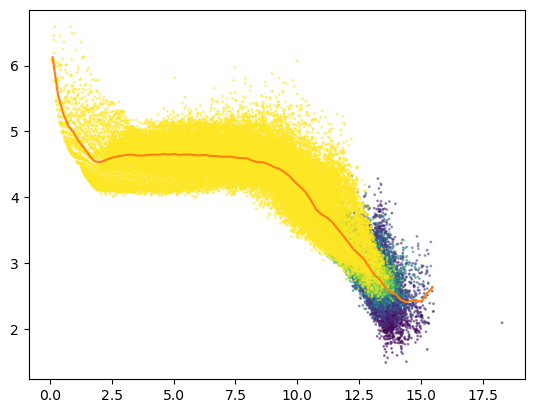

In [90]:
plt.scatter(amplitude, np.log10(1/10**b_power_knee), s=1, c=np.log10(stability), cmap="viridis", alpha=0.5)
plt.plot(amplitude_bin_centers, b_power_knee_mean, c="C1")
# plt.yscale("log")

(array([   3.,    4.,    2.,    5.,    4.,    8.,    7.,    8.,   19.,
          16.,   18.,   15.,   26.,   23.,   27.,   50.,   70.,   81.,
          80.,  106.,  185.,  251.,  473.,  930., 1583., 1609., 1482.,
        1481., 1496., 1453., 1532., 1542., 1574., 1564., 1507., 1512.,
        1475., 1445., 1397., 1267., 1199., 1138.,  974.,  807.,  777.,
         683.,  684.,  537.,  534.,  504.,  458.,  500.,  443.,  458.,
         487.,  431.,  468.,  456.,  507.,  509.,  519.,  552.,  529.,
         531.,  529.,  534.,  554.,  547.,  551.,  528.,  563.,  528.,
         458.,  329.,  292.,  247.,  205.,  192.,  179.,  172.,  156.,
         183.,  135.,  138.,  116.,   84.,   36.,   12.,    3.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.]),
 array([-6.  , -5.96, -5.92, -5.88, -5.84, -5.8 , -5.76, -5.72, -5.68,
        -5.64, -5.6 , -5.56, -5.52, -5.48, -5.44, -5.4 , -5.36, -5.32,
        -5.28, -5.24, -5.2 , -5.16, -5.12, -5.08, -5.04, -5.

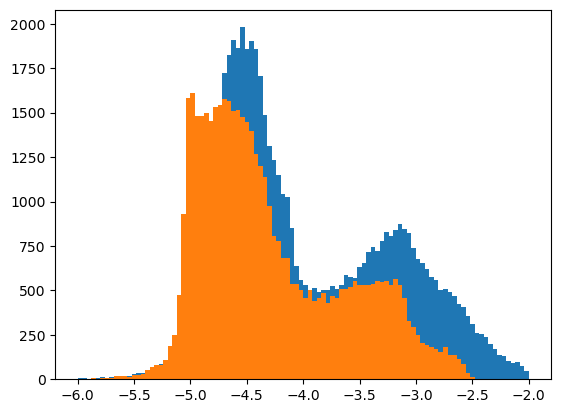

In [84]:
plt.hist(b_power_knee, bins=100, range=(-6,-2))
plt.hist(np.log10(disp_x[-1]), bins=100, range=(-6,-2))